In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']]

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,6,148,72,35,0,50,1
1,1,85,66,29,0,31,0
2,8,183,64,0,0,32,1
3,1,89,66,23,94,21,0
4,0,137,40,35,168,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   SkinThickness  768 non-null    int64
 4   Insulin        768 non-null    int64
 5   Age            768 non-null    int64
 6   Outcome        768 non-null    int64
dtypes: int64(7)
memory usage: 42.1 KB


In [13]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
Age              0
Outcome          0
dtype: int64

<AxesSubplot:xlabel='BloodPressure'>

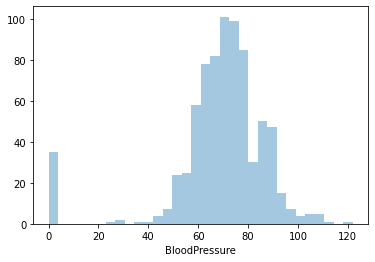

In [17]:
sns.distplot(df['BloodPressure'],kde=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   SkinThickness  768 non-null    int64
 4   Insulin        768 non-null    int64
 5   Age            768 non-null    int64
 6   Outcome        768 non-null    int64
dtypes: int64(7)
memory usage: 42.1 KB


In [20]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [21]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [22]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [23]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [24]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [25]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [26]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [94]:
X = df.drop('Outcome',axis=1)
X = X.drop('BloodPressure',axis=1)
y = df[['Outcome','BloodPressure']]

In [95]:
X

,Pregnancies,Glucose,SkinThickness,Insulin,Age
0,6,148,35,0,50
1,1,85,29,0,31
2,8,183,0,0,32
3,1,89,23,94,21
4,0,137,35,168,33
...,...,...,...,...,...
763,10,101,48,180,63
764,2,122,27,0,27
765,5,121,23,112,30
766,1,126,0,0,47


In [82]:
linear_reg = LinearRegression()

In [83]:
linear_reg.fit(X,y.values)

LinearRegression()

In [84]:
y_pred = linear_reg.predict(X)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = np.sqrt(mean_squared_error(y,y.values))

In [86]:
error

0.0

In [87]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [88]:
y_pred = dec_tree_reg.predict(X)

In [89]:
error = np.sqrt(mean_squared_error(y,y.values))
error

0.0

In [90]:
X

,Pregnancies,Glucose,SkinThickness,Insulin,Age
0,6,148,35,0,50
1,1,85,29,0,31
2,8,183,0,0,32
3,1,89,23,94,21
4,0,137,35,168,33
...,...,...,...,...,...
763,10,101,48,180,63
764,2,122,27,0,27
765,5,121,23,112,30
766,1,126,0,0,47


In [96]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
0,6,148,72,35,0,50,1
1,1,85,66,29,0,31,0
2,8,183,64,0,0,32,1
3,1,89,66,23,94,21,0
4,0,137,40,35,168,33,1
...,...,...,...,...,...,...,...
763,10,101,76,48,180,63,0
764,2,122,70,27,0,27,0
765,5,121,72,23,112,30,0
766,1,126,60,0,0,47,1


In [91]:
X = np.array([[1,85,29,0,31]])
X

array([[ 1, 85, 29,  0, 31]])

In [92]:
y_pred= dec_tree_reg.predict(X)
y_pred

array([[ 0., 66.]])

In [71]:
import pickle

In [72]:
data = {
    'model': dec_tree_reg,
}

with open('ML_model','wb') as file:
    pickle.dump(data,file)

In [73]:
with open('ML_model','rb') as file:
    data = pickle.load(file)

ML_Model = data['model']

In [74]:
y_pred = ML_Model.predict(X)
y_pred

array([0.])